In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
import pandas_datareader
import pandas_datareader.data as web
from functools import reduce
# pretty printing of pandas dataframe
pd.set_option('expand_frame_repr', False)  

In [2]:
### CRYPTO ###
##############
# details here: https://tcoil.info/how-to-get-price-data-for-bitcoin-and-cryptocurrencies-with-python-json-restful-api/

# GET CURRENT PRICE DATA
def get_current_data(from_sym='BTC', to_sym='USD', exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price'    
    
    parameters = {'fsym': from_sym,
                  'tsyms': to_sym }
    
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange
        
    # response comes as json
    response = requests.get(url, params=parameters)   
    data = response.json()
    
    return data   

In [3]:
get_current_data('BTC','USD','coinbase')

exchange:  coinbase


{'USD': 37208.89}

In [4]:
def get_hist_data(from_sym='BTC', to_sym='USD', timeframe = 'day', limit=1000, aggregation=1, exchange=''):
    
    url = 'https://min-api.cryptocompare.com/data/v2/histo'
    url += timeframe
    
    parameters = {'fsym': from_sym,
                  'tsym': to_sym,
                  'limit': limit,
                  'aggregate': aggregation}
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange    
    
    print('url: ', url) 
    print('timeframe: ', timeframe)
    print('parameters: ', parameters)
    
    # response comes as json
    response = requests.get(url, params=parameters)   
    
    data = response.json()['Data']['Data'] 
    
    return data     

In [5]:
def data_to_dataframe(data):
    # data from json is in array of dictionaries
    df = pd.DataFrame.from_dict(data)
    
    # time is stored as an epoch, we need normal dates
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    print(df.tail())
    
    return df

In [6]:
def plot_data(df, cryptocurrency, target_currency):
    
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    
    plt.figure(figsize=(15,5))
    plt.title('{} / {} price data'.format(cryptocurrency, target_currency))
    plt.plot(df.index, df.close)
    plt.legend()
    plt.show()
    
    return None

url:  https://min-api.cryptocompare.com/data/v2/histoday
timeframe:  day
parameters:  {'fsym': 'BTC', 'tsym': 'USD', 'limit': 1000, 'aggregate': 1}
               close conversionSymbol conversionType      high       low      open  volumefrom      volumeto
time                                                                                                        
2021-01-12  34058.40                          direct  36620.28  32522.98  35496.03   115232.53  3.999536e+09
2021-01-13  37380.85                          direct  37809.67  32405.89  34058.40    91979.17  3.198683e+09
2021-01-14  39155.58                          direct  40093.43  36751.89  37380.85    74972.21  2.895085e+09
2021-01-15  36790.17                          direct  39695.43  34396.19  39155.58    89468.27  3.288448e+09
2021-01-16  37231.13                          direct  37942.44  35548.14  36790.17    45182.33  1.407472e+09


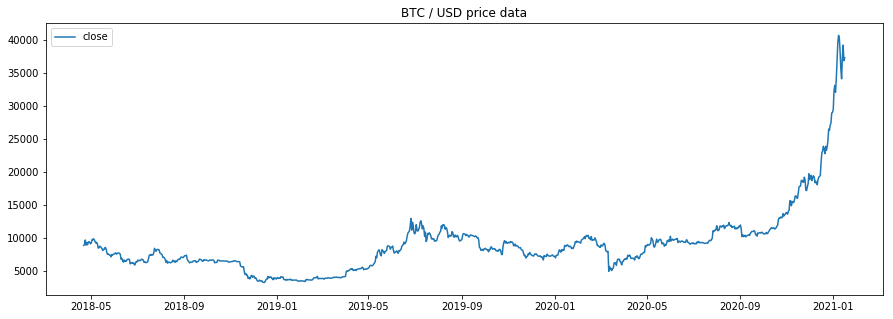

In [7]:
cryptocurrency = 'BTC'
target_currency = 'USD'

data = get_hist_data(cryptocurrency, target_currency, 'day', 1000)
df = data_to_dataframe(data)

plot_data(df, cryptocurrency, target_currency)

In [8]:
def get_stock_data(ticker):
    # latest Microstrategy BTC purchase: Dec 21, 2020
    start = datetime(2018, 1, 1)
    end = pd.to_datetime('today').normalize()
    
    data = web.DataReader(ticker, 'yahoo', start, end).reset_index()
    
    return data

In [9]:
mstr = get_stock_data('MSTR')
riot = get_stock_data('RIOT')
aapl = get_stock_data('AAPL')
sp_500 = get_stock_data('SWPPX')
mstr.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-01-02,134.669998,130.550003,131.639999,131.800003,55500,131.800003
1,2018-01-03,134.009995,131.699997,131.929993,132.380005,71900,132.380005
2,2018-01-04,135.440002,133.039993,133.259995,135.059998,76500,135.059998
3,2018-01-05,135.889999,134.009995,135.339996,135.009995,51200,135.009995
4,2018-01-08,136.940002,133.949997,134.770004,136.610001,56700,136.610001


In [10]:
def plot_stock(df, title):
    
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    
    plt.figure(figsize=(15,5))
    plt.plot(df.Date, df.Close)
    plt.title('{} Share Price'.format(title))
    plt.legend()
    plt.show()
    
    return None

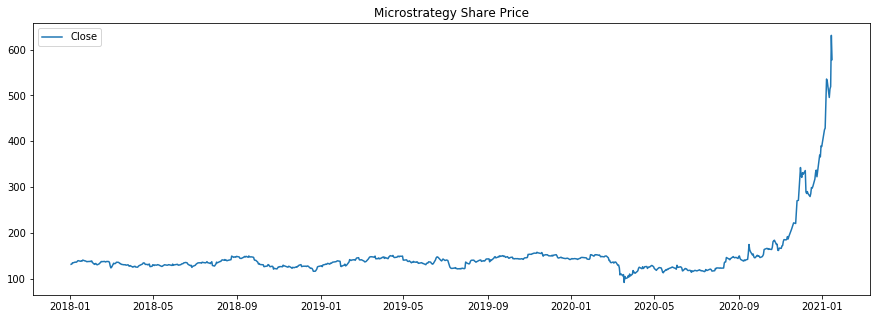

In [11]:
plot_stock(mstr, 'Microstrategy')

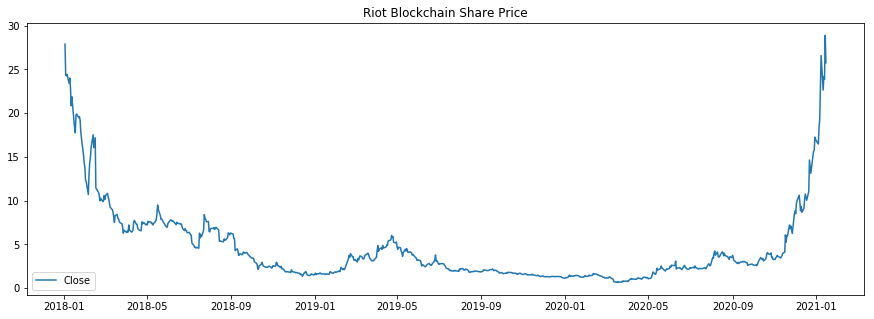

In [12]:
plot_stock(riot, 'Riot Blockchain')

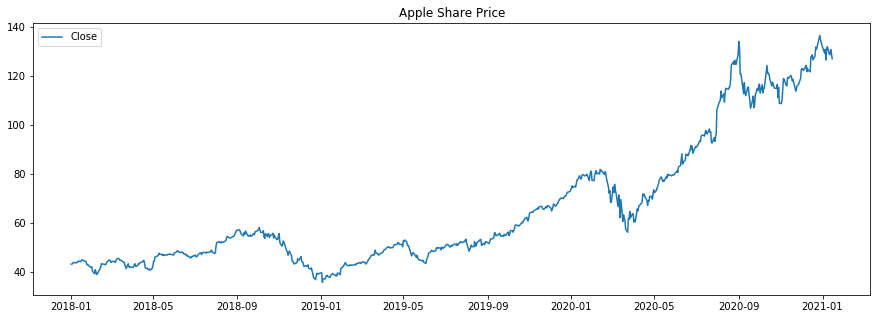

In [13]:
plot_stock(aapl, 'Apple')

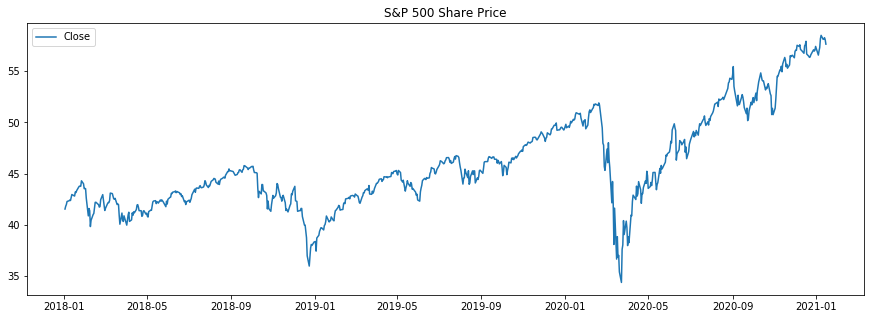

In [14]:
plot_stock(sp_500, 'S&P 500')

In [15]:
mstr_close_prices = mstr[['Date', 'Close']]
mstr_close_prices.columns = ['date', 'ms_close']

riot_close_prices = riot[['Date', 'Close']]
riot_close_prices.columns = ['date', 'riot_close']

aapl_close_prices = aapl[['Date', 'Close']]
aapl_close_prices.columns = ['date', 'aapl_close']

sp_500_close_prices = sp_500[['Date', 'Close']]
sp_500_close_prices.columns = ['date', 'sp_500_close']

sp_500_close_prices.head()

,date,sp_500_close
0,2018-01-02,41.529999
1,2018-01-03,41.799999
2,2018-01-04,41.970001
3,2018-01-05,42.270000
4,2018-01-08,42.340000


In [16]:
btc_close_prices = df.reset_index()
btc_close_prices = btc_close_prices[['time', 'close']]
btc_close_prices.columns = ['date', 'btc_close']
btc_close_prices.head()

,date,btc_close
0,2018-04-22,8823.36
1,2018-04-23,8968.25
2,2018-04-24,9655.77
3,2018-04-25,8873.62
4,2018-04-26,9282.12


In [17]:
to_merge = [btc_close_prices, mstr_close_prices, riot_close_prices, aapl_close_prices, sp_500_close_prices]

combined_df = reduce(lambda x,y: pd.merge(x, y, on=['date']), to_merge)

combined_df.head()

,date,btc_close,ms_close,riot_close,aapl_close,sp_500_close
0,2018-04-23,8968.25,131.520004,6.55,41.310001,41.369999
1,2018-04-24,9655.77,130.339996,7.58,40.735001,40.820000
2,2018-04-25,8873.62,131.580002,7.36,40.912498,40.889999
3,2018-04-26,9282.12,132.289993,7.47,41.055000,41.320000
4,2018-04-27,8938.47,126.690002,7.49,40.580002,41.369999


In [18]:
combined_df.corr(method='pearson')

,btc_close,ms_close,riot_close,aapl_close,sp_500_close
btc_close,1.000000,0.871312,0.711856,0.726152,0.756422
ms_close,0.871312,1.000000,0.820307,0.542315,0.622044
riot_close,0.711856,0.820307,1.000000,0.312724,0.359328
aapl_close,0.726152,0.542315,0.312724,1.000000,0.894891
sp_500_close,0.756422,0.622044,0.359328,0.894891,1.000000


In [19]:
recent = combined_df[combined_df['date']>='2020-7-1']
recent.head()

,date,btc_close,ms_close,riot_close,aapl_close,sp_500_close
552,2020-07-01,9238.89,117.800003,2.34,91.027496,48.110001
553,2020-07-02,9092.80,117.349998,2.29,91.027496,48.340000
554,2020-07-06,9347.05,119.750000,2.38,93.462502,49.110001
555,2020-07-07,9257.32,118.089996,2.29,93.172501,48.580002
556,2020-07-08,9439.20,118.220001,2.54,95.342499,48.959999


In [20]:
recent.corr(method='pearson')

,btc_close,ms_close,riot_close,aapl_close,sp_500_close
btc_close,1.000000,0.975060,0.975114,0.652016,0.790635
ms_close,0.975060,1.000000,0.975985,0.659311,0.815107
riot_close,0.975114,0.975985,1.000000,0.624059,0.740763
aapl_close,0.652016,0.659311,0.624059,1.000000,0.874673
sp_500_close,0.790635,0.815107,0.740763,0.874673,1.000000
